# Information Security Assignment # 2
# i210308 - Ahmed Kamal
# i210318 - Abdullah Rasheed

In [1]:
!unzip /content/FinalDataset.zip

Archive:  /content/FinalDataset.zip
   creating: FinalDataset/
  inflating: FinalDataset/.DS_Store  
  inflating: FinalDataset/All.csv    
  inflating: FinalDataset/All_BestFirst.csv  
  inflating: FinalDataset/All_BestFirst_test.csv  
  inflating: FinalDataset/All_Infogain.csv  
  inflating: FinalDataset/All_Infogain_test.csv  
  inflating: FinalDataset/Defacement.csv  
  inflating: FinalDataset/Defacement_BestFirst.csv  
  inflating: FinalDataset/Defacement_Infogain.csv  
  inflating: FinalDataset/Defacement_Infogain_test.csv  
  inflating: FinalDataset/Malware.csv  
  inflating: FinalDataset/Malware_BestFirst.csv  
  inflating: FinalDataset/Malware_Infogain.csv  
  inflating: FinalDataset/Malware_Infogain_test.csv  
  inflating: FinalDataset/Phishing.csv  
  inflating: FinalDataset/Phishing_BestFirst.csv  
  inflating: FinalDataset/Phishing_Infogain.csv  
  inflating: FinalDataset/Phishing_Infogain_test.csv  
  inflating: FinalDataset/Spam.csv   
  inflating: FinalDataset/Spam_BestF

## All Libraries

In [2]:
# Scikit-Learn Modules
from sklearn.preprocessing import LabelEncoder

# Other Necessary Libraries
import pandas as pd

## All Declarations

In [5]:
# Define a list of file paths and corresponding types
file_paths = [
    ("FinalDataset/URL/Benign_list_big_final.csv", "benign"),
    ("FinalDataset/URL/DefacementSitesURLFiltered.csv", "defacement"),
    ("FinalDataset/URL/Malware_dataset.csv", "malware"),
    ("FinalDataset/URL/phishing_dataset.csv", "phishing"),
    ("FinalDataset/URL/spam_dataset.csv", "spam")
]

## All Functions

## Main

### Data Merging

In [10]:
main = pd.read_csv("malicious_phish.csv")
main

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [11]:
# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:

    # Read the CSV file
    df = pd.read_csv(file_path, header=None)

    # Assign column names
    df.columns = ["url"]

    # Add a column for the URL type
    df["type"] = url_type

    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)

# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

# Remove duplicate rows
initial_shape = merged_df.shape
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.reset_index(drop=True)
print(f"Removed {initial_shape[0] - merged_df.shape[0]} duplicate rows.")

# Display the merged dataframe
merged_df.head(100000)

Removed 163511 duplicate rows.


,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


### Pre-processing

In [12]:
# Display missing value counts for each column
print("Missing values before cleaning:")
print(merged_df.isnull().sum())

Missing values before cleaning:
url     0
type    0
dtype: int64


In [13]:
# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'type' column
merged_df['type_encoded'] = le.fit_transform(merged_df['type'])

# Displaying The Mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'benign': np.int64(0), 'defacement': np.int64(1), 'malware': np.int64(2), 'phishing': np.int64(3), 'spam': np.int64(4)}


In [14]:
merged_df.head()

,url,type,type_encoded
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0


### Balancing The Dataset

In [16]:
merged_df['type'].value_counts()

,count
type,
benign,428080
defacement,95308
phishing,94092
malware,23645
spam,11921


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Step 1: Convert URL text to numerical features using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(merged_df['url'])
y = merged_df['type_encoded']

# Check the original class distribution
original_counts = pd.Series(y).value_counts()
print("Original class distribution:\n", original_counts)

# Define a target threshold for balancing
target_samples = 30000

# Step 2: Undersampling Majority Classes
# For classes with more than the target, we reduce their count; for others, keep as is.
undersample_strategy = {cls: min(count, target_samples)
                        for cls, count in original_counts.to_dict().items()}
print("Undersampling strategy:", undersample_strategy)

# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_under, y_under = rus.fit_resample(X, y)

# Check class distribution after undersampling
undersampled_counts = pd.Series(y_under).value_counts()
print("\nDistribution after undersampling:\n", undersampled_counts)

# Step 3: Oversampling Minority Classes using SMOTE
# For classes with fewer than target_samples after undersampling,
# define a strategy to upsample them to the target count.
smote_strategy = {cls: target_samples for cls, count in undersampled_counts.items() if count < target_samples}
print("SMOTE strategy:", smote_strategy)

# Apply SMOTE
smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Final distribution after hybrid sampling
final_counts = pd.Series(y_resampled).value_counts()
print("\nFinal distribution after hybrid sampling:\n", final_counts)

Original class distribution:
 type_encoded
0    428080
1     95308
3     94092
2     23645
4     11921
Name: count, dtype: int64
Undersampling strategy: {0: 30000, 1: 30000, 3: 30000, 2: 23645, 4: 11921}

Distribution after undersampling:
 type_encoded
0    30000
1    30000
3    30000
2    23645
4    11921
Name: count, dtype: int64
SMOTE strategy: {2: 30000, 4: 30000}

Final distribution after hybrid sampling:
 type_encoded
0    30000
1    30000
2    30000
3    30000
4    30000
Name: count, dtype: int64


### Exploratory Data Analysis (EDA)

Dataset Summary:
                                    url    type   type_encoded
count                            653046  653046  653046.000000
unique                           653040       5            NaN
top     routesinternational.com/air.htm  benign            NaN
freq                                  2  428080            NaN
mean                                NaN     NaN       0.723621
std                                 NaN     NaN       1.164454
min                                 NaN     NaN       0.000000
25%                                 NaN     NaN       0.000000
50%                                 NaN     NaN       0.000000
75%                                 NaN     NaN       1.000000
max                                 NaN     NaN       4.000000

Class Distribution:
type
benign        428080
defacement     95308
phishing       94092
malware        23645
spam           11921
Name: count, dtype: int64


<ipython-input-18-0bec673418fa>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


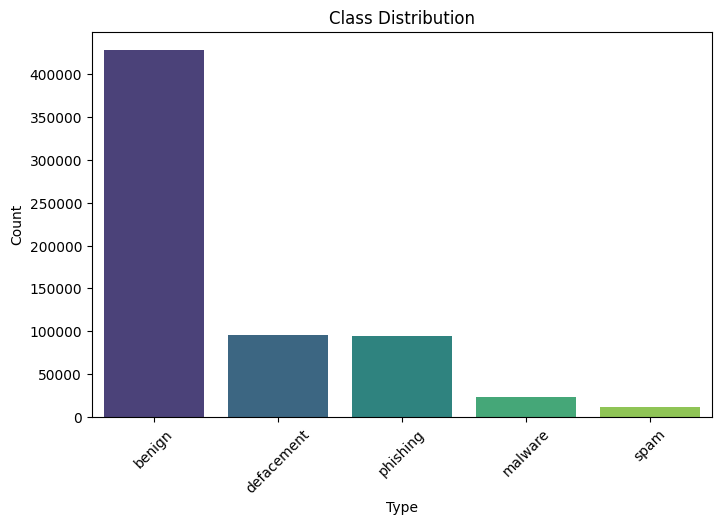

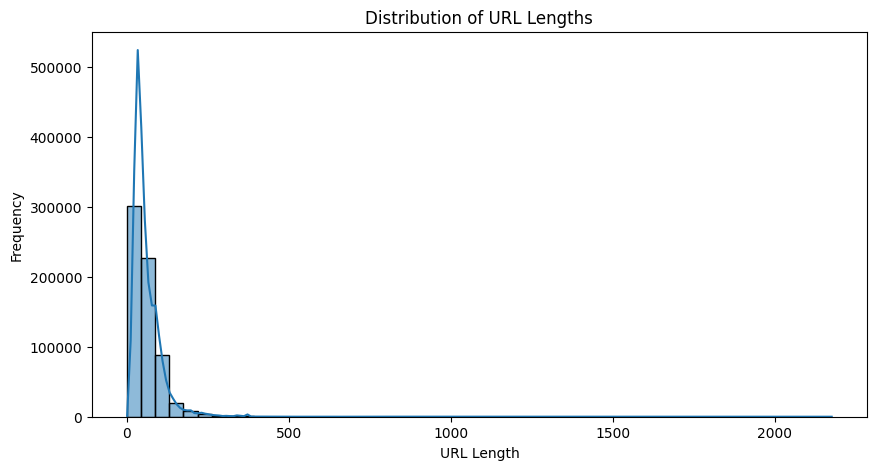


Sample URL Tokens:
                                                 url  \
0  http://1337x.to/torrent/1048648/American-Snipe...   
1  http://1337x.to/torrent/1110018/Blackhat-2015-...   
2  http://1337x.to/torrent/1122940/Blackhat-2015-...   
3  http://1337x.to/torrent/1124395/Fast-and-Furio...   
4  http://1337x.to/torrent/1145504/Avengers-Age-o...   

                                          url_tokens  
0  [1337x, to, torrent, 1048648, American-Sniper-...  
1  [1337x, to, torrent, 1110018, Blackhat-2015-RU...  
2  [1337x, to, torrent, 1122940, Blackhat-2015-x2...  
3  [1337x, to, torrent, 1124395, Fast-and-Furious...  
4  [1337x, to, torrent, 1145504, Avengers-Age-of-...  

Average URL Length by Class:
type
phishing       45.852889
malware        46.610277
benign         57.675773
defacement     86.128405
spam          127.148477
Name: url_length, dtype: float64


<ipython-input-18-0bec673418fa>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length_by_class.index, y=avg_length_by_class.values, palette='magma')


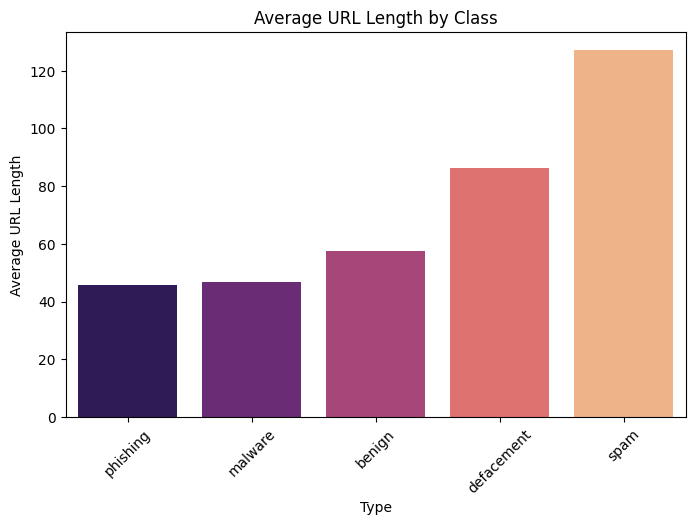


Top tokens for benign:
[('com', 20628), ('wiki', 16151), ('en.wikipedia.org', 12670), ('2011', 9382), ('watch', 9039), ('youtube.com', 8617), ('facebook.com', 7735), ('news', 7038), ('people', 5640), ('net', 5611)]

Top tokens for defacement:
[('www', 66318), ('index.php', 49013), ('com', 39122), ('de', 11698), ('index.html', 7540), ('nl', 6659), ('component', 5753), ('br', 5004), ('org', 4676), ('it', 4436)]

Top tokens for malware:
[('com', 5811), ('Mozi.m', 4100), ('uploads', 2944), ('jp', 2896), ('mixh', 2881), ('mitsui-jyuku', 2879), ('bins', 1582), ('apbfiber', 1147), ('openme', 1146), ('raw', 1002)]

Top tokens for phishing:
[('com', 15759), ('www', 6400), ('html', 3468), ('tools.ietf.org', 3190), ('index.html', 2269), ('co', 1705), ('net', 1652), ('wp-content', 1564), ('uk', 1319), ('www.angelfire.com', 1295)]

Top tokens for spam:
[('uk', 11887), ('co', 8794), ('archive', 3123), ('ac', 2402), ('amazon', 1157), ('aol', 1063), ('main.php', 775), ('search', 679), ('adservers', 6

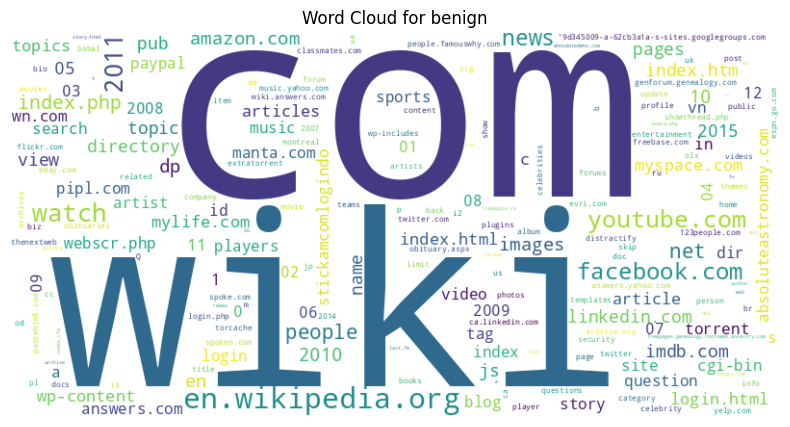

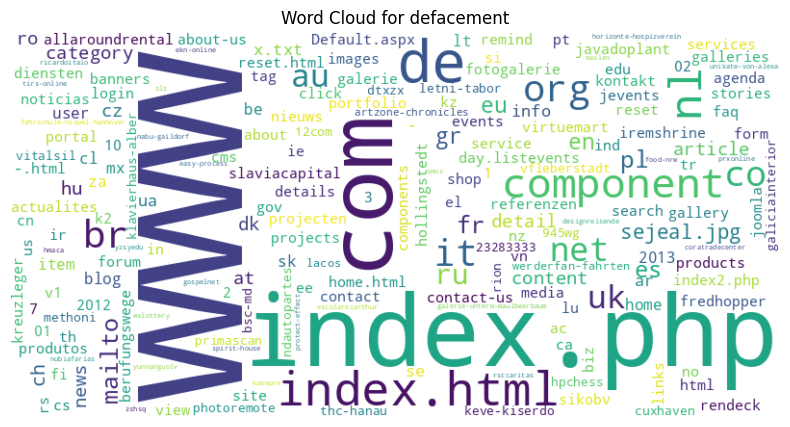

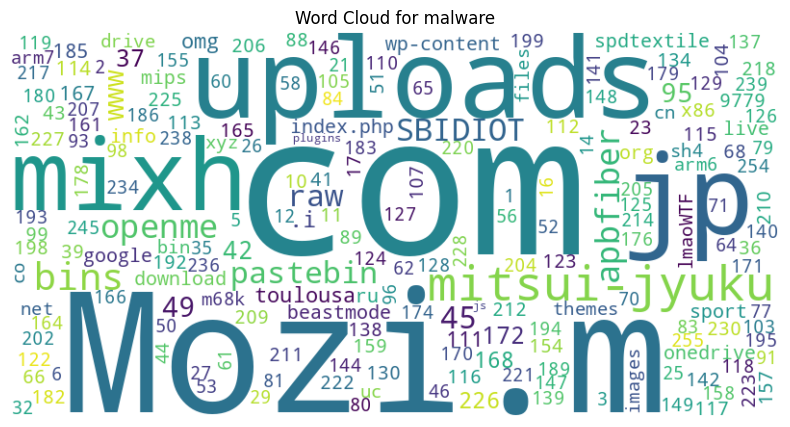

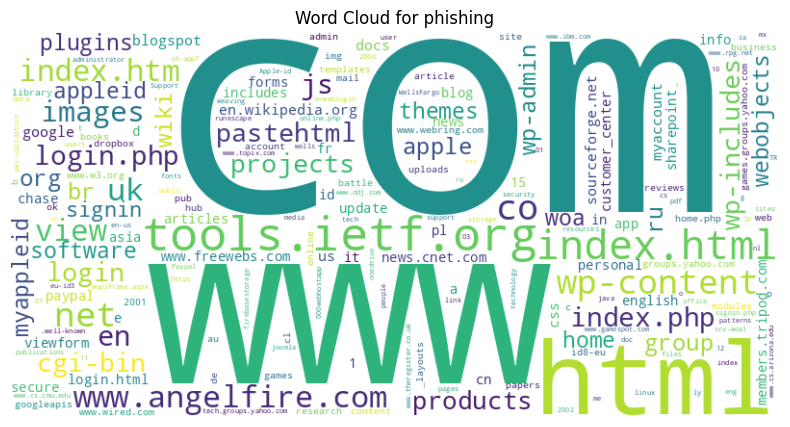

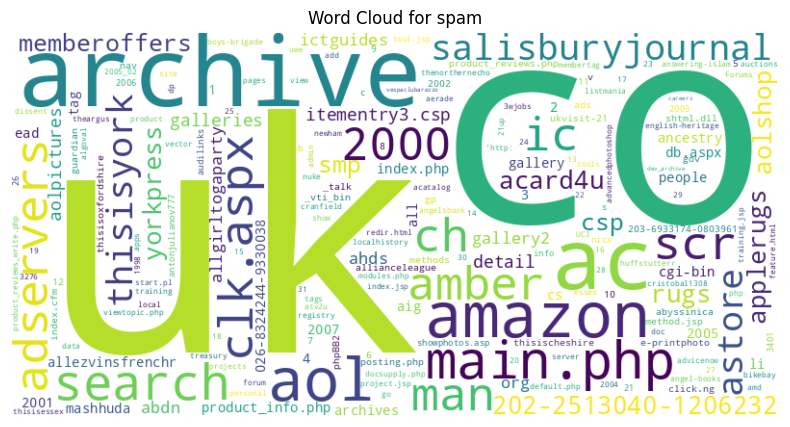

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.parse import urlparse

# Assume merged_df is your DataFrame with columns: url, type, type_encoded
# For example:
# merged_df = pd.read_csv('your_merged_dataset.csv')

# 1. Descriptive Statistics
print("Dataset Summary:")
print(merged_df.describe(include='all'))

# Count of each class
class_counts = merged_df['type'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Analyze URL Lengths
# Add a new column with the length of each URL
merged_df['url_length'] = merged_df['url'].apply(len)

# Plot distribution of URL lengths
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['url_length'], bins=50, kde=True)
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

# 3. Extract URL Tokens for further analysis
def extract_url_tokens(url):
    # Parse the URL to extract components
    parsed = urlparse(url)
    # Extract netloc (domain) and path tokens
    domain = parsed.netloc
    # Split domain into tokens using '.' as delimiter
    domain_tokens = domain.split('.')
    # For the path, remove leading/trailing slashes and split by '/'
    path_tokens = parsed.path.strip('/').split('/')
    # Filter out empty tokens and combine
    tokens = [token for token in domain_tokens if token] + [token for token in path_tokens if token]
    return tokens

# Apply extraction function and create a new column with tokens (as list)
merged_df['url_tokens'] = merged_df['url'].apply(extract_url_tokens)

# Display sample of tokenized URLs
print("\nSample URL Tokens:")
print(merged_df[['url', 'url_tokens']].head())

# 4. Visualize Relationships Between URL Structure and Malicious Behavior

# For instance, we can compare average URL length by class:
avg_length_by_class = merged_df.groupby('type')['url_length'].mean().sort_values()
print("\nAverage URL Length by Class:")
print(avg_length_by_class)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_length_by_class.index, y=avg_length_by_class.values, palette='magma')
plt.title("Average URL Length by Class")
plt.xlabel("Type")
plt.ylabel("Average URL Length")
plt.xticks(rotation=45)
plt.show()

# More advanced analysis: Count token frequency across classes
from collections import Counter

# Function to count tokens in a list of token lists for a given class
def token_frequency(dataframe, target_class):
    tokens = []
    for token_list in dataframe[dataframe['type'] == target_class]['url_tokens']:
        tokens.extend(token_list)
    return Counter(tokens)

# Example: Display the 10 most common tokens for each class
classes = merged_df['type'].unique()
for cls in classes:
    freq = token_frequency(merged_df, cls)
    print(f"\nTop tokens for {cls}:")
    print(freq.most_common(10))

# You can also create word clouds or other visualizations for each class.
# (Make sure to install the 'wordcloud' package if you want to use it.)
from wordcloud import WordCloud
for cls in classes:
    freq = token_frequency(merged_df, cls)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {cls}")
    plt.axis('off')
    plt.show()